In [1]:
import pandas as pd
import os
from scipy.stats import spearmanr
import numpy as np
import argparse
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
saprot_res = 

,benchmark_name,model,spearmanr_pred,ndcg_pred
0,TAT_HV1BR,DeepSequence_single,0.325890,0.744651
1,TAT_HV1BR,DeepSequence_ensemble,0.336239,0.743906
2,TAT_HV1BR,MSA_Transformer_single,0.377270,0.735960
3,TAT_HV1BR,MSA_Transformer_ensemble,0.396975,0.740175
4,TAT_HV1BR,ESM1b,0.223155,0.592839
...,...,...,...,...
370,FKBP3_HUMAN,Progen2_large,0.307840,0.758325
371,FKBP3_HUMAN,ProtGPT2,-0.023986,0.654727
372,FKBP3_HUMAN,ESM-IF1,0.664495,0.887220
373,FKBP3_HUMAN,ProteinMPNN,0.582256,0.877710


In [33]:
test_num = 1

In [34]:

result_dir = f"/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_0917_variational_sampling_{test_num}/"
benchmarks = os.listdir(result_dir)

In [35]:
result_folder = pd.DataFrame({"benchmark_name": [],
                              "model": [],
                              "spearmanr_pred": [],
                              "ndcg_pred": []})

model_list = ["DeepSequence_single", "DeepSequence_ensemble", "MSA_Transformer_single", "MSA_Transformer_ensemble",
              "ESM1b", "ESM1v_single", "ESM1v_ensemble", "ESM2_15B", "ESM2_3B", "Progen2_xlarge", "Progen2_large", "ProtGPT2",
              "ESM-IF1", "ProteinMPNN", "UNAAGI"]
for benchmark in benchmarks:
    benchmark_name = '_'.join(benchmark.split('_')[:2])
    bm_path = os.path.join(result_dir, benchmark)
    result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
    for model in model_list:
        spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
        ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
        result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                "model": [model],
                                                                "spearmanr_pred": [spr],
                                                                "ndcg_pred": [ndcg]})], ignore_index=True)
        


In [36]:
result_folder

,benchmark_name,model,spearmanr_pred,ndcg_pred
0,TAT_HV1BR,DeepSequence_single,0.325890,0.744651
1,TAT_HV1BR,DeepSequence_ensemble,0.336239,0.743906
2,TAT_HV1BR,MSA_Transformer_single,0.377270,0.735960
3,TAT_HV1BR,MSA_Transformer_ensemble,0.396975,0.740175
4,TAT_HV1BR,ESM1b,0.223155,0.592839
...,...,...,...,...
370,FKBP3_HUMAN,Progen2_large,0.307840,0.758325
371,FKBP3_HUMAN,ProtGPT2,-0.023986,0.654727
372,FKBP3_HUMAN,ESM-IF1,0.664495,0.887220
373,FKBP3_HUMAN,ProteinMPNN,0.582256,0.877710


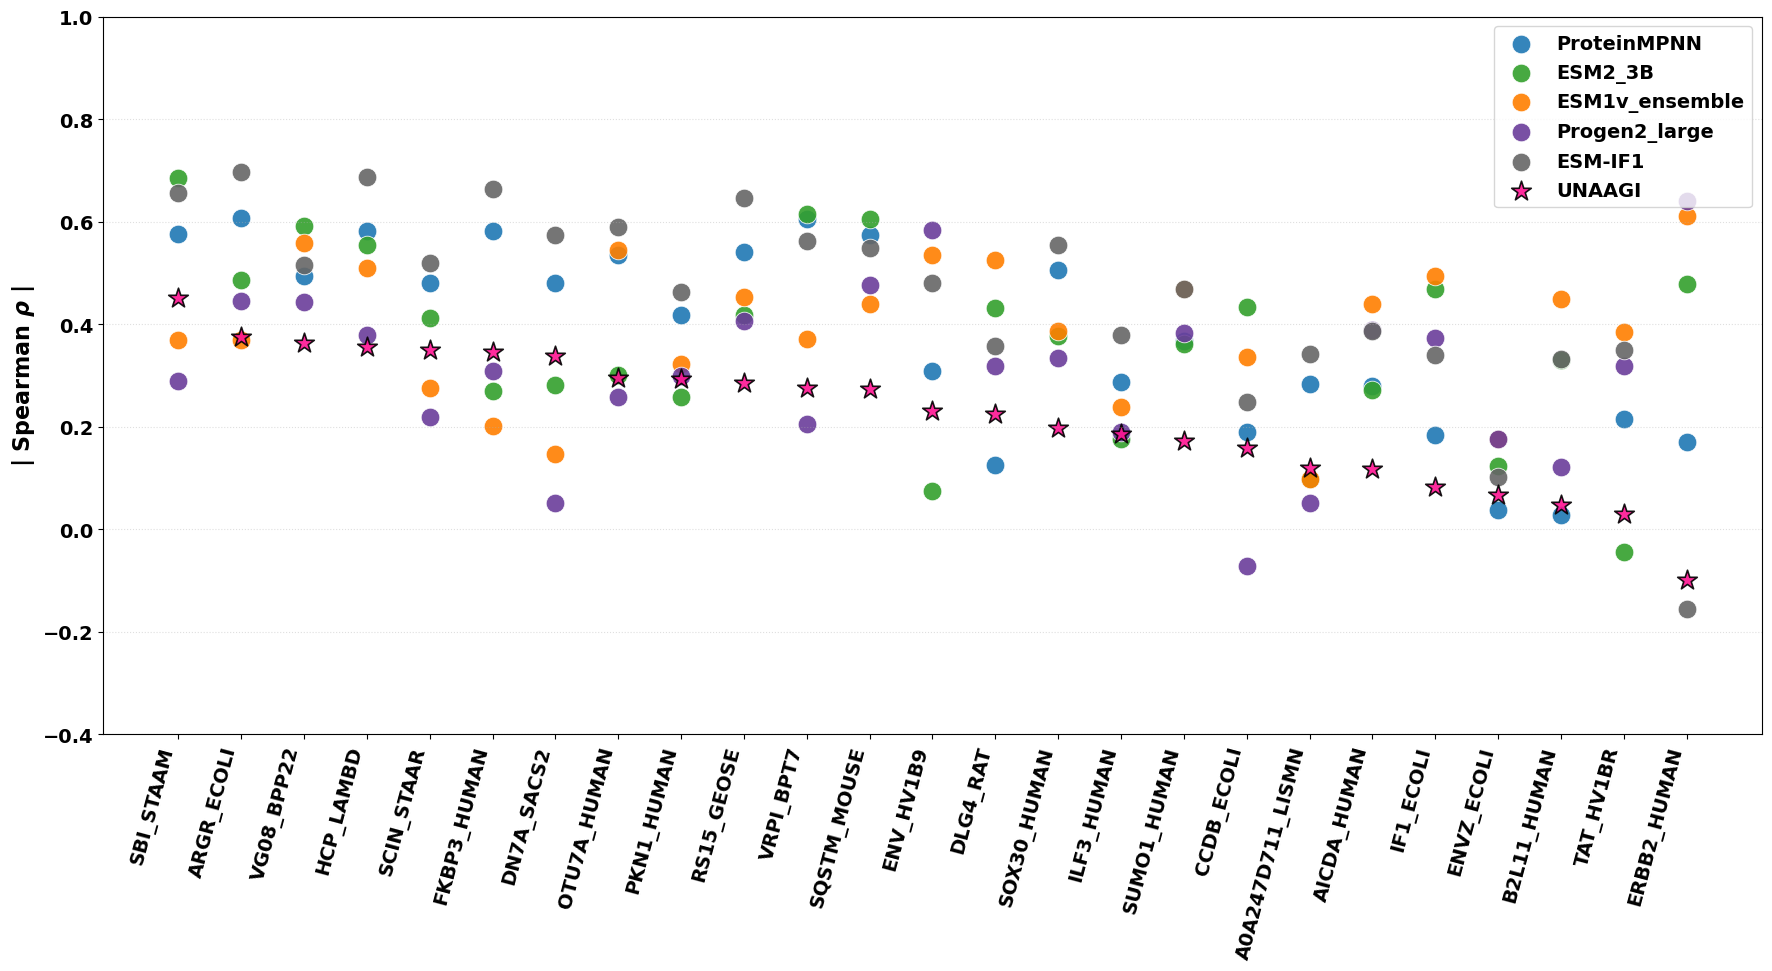

Average Spearmanr of UNAAGI: 0.2216


In [37]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    "ProteinMPNN",
    "ESM2_3B",
    "ESM1v_ensemble",
    "Progen2_large",
    "ESM-IF1",
    "UNAAGI",
]
colors = {
    "PepINVENT": "black",     # black
    "ProteinMPNN": "#1f78b4",             # dark blue
    "ESM2_3B": "#33a02c",                 # dark green
    "UNAAGI": "#ff1493",                  # bright red (highlight)
    "ESM1v_ensemble": "#ff7f00",          # orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666"
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[-1]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    if m == ref_model:
        y = piv_sorted[m].values
        plt.scatter(
            x, y, marker="*",
            s=220,
            alpha=0.9,
            label=m,
            edgecolor="black",
            linewidth=1.2,
            color=colors.get(m, None)  # fallback to Matplotlib default if not specified
        )
    else:
        y = piv_sorted[m].values
        plt.scatter(
            x, y,
            s=180,
            alpha=0.9,
            label=m,
            edgecolor="white",
            linewidth=0.6,
            color=colors.get(m, None)  # fallback to Matplotlib default if not specified
        )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.4, 1.0)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.legend(title="", frameon=True, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
plt.savefig("UNAAGI_proteingym_atomic.svg", format="svg", dpi=300)
plt.show()

# print the average spearmanr of UNAAGI
unaagi_spearmanr = piv_sorted["UNAAGI"].values
average_unaagi_spearmanr = np.mean(unaagi_spearmanr)
print(f"Average Spearmanr of UNAAGI: {average_unaagi_spearmanr:.4f}")


In [ ]:
saprot = {"benchmark_name": ["SBI_STAAM", "ARGR_ECOLI", "VG08_BPP22", "HCP_LAMBD", "SCIN_STAAR", "FKBP3_HUMAN", "DN7A_SACS2", "OTU7A_HUMAN", "PKN1_HUMAN", "RS15_GEOSE", "VRPI_BPT7"],
          "spearmanr": [0.683, 0.604, 0.619, 0.768, 0.62, 0.581, 0.556, 0.642, 0.324, 0.433, ]}